In [1]:
# script to plot sampling altitudes for each flight, show each awas and toga measurement 
# author: sofia chelpon
# created: June 5, 2020 

In [3]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [4]:
mypath1 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_trace_gases_twp_noRF06.nc'
toga_trc = xr.open_dataset(mypath1)

mypath = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/testing_data_treatments/toga_trace_gases_fulldomain.nc'
toga_trc_whole = xr.open_dataset(mypath)

mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_trace_gases_twp_noRF06.nc'
awas_trc = xr.open_dataset(mypath2)

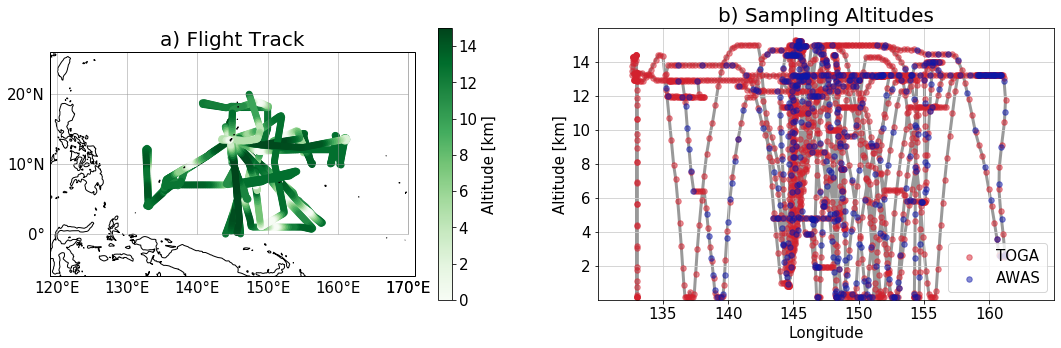

In [5]:
# plot by longitude on x axis, altitude on y axis
fig = plt.figure(figsize=(18,5)) 
########## plot location 
ax1 = plt.subplot(1, 2, 1, projection = ccrs.PlateCarree())
ax1.scatter(toga_trc.GGLON, toga_trc.GGLAT, c = toga_trc.GGALT/1000, cmap = 'Greens')
ax1.set_title('a) Flight Track', fontsize=20)

# colorbar
m = plt.cm.ScalarMappable(cmap='Greens')
m.set_array(toga_trc.GGALT.values/1000)
m.set_clim(0, 15)
cbar = plt.colorbar(m)
cbar.set_label('Altitude [km]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

# extents 
latmin = -5
latmax = 25
lonmin = 120 
lonmax = 170

ax1.set_extent([lonmin-1, lonmax+1, latmin-1, latmax+1], ccrs.PlateCarree())
ax1.coastlines(resolution='50m', color='k', linewidth=1)
gg = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='0.6', linestyle='-')
gg.xlocator = mticker.FixedLocator([110, lonmin, 130, 140, 150, 160, lonmax, 170])
gg.ylocator = mticker.FixedLocator([0, 10, 20, 30])

gg.xlabels_top = False
gg.ylabels_right = False
gg.xformatter = LONGITUDE_FORMATTER
gg.yformatter = LATITUDE_FORMATTER
gg.xlabel_style = {'size': 15, 'color': 'k'}
gg.ylabel_style = {'size': 15, 'color': 'k'}

########################################################################################
########################################################################################
ax0 = plt.subplot(1, 2, 2)
# plot general flight track first 
ax0.plot(toga_trc.GGLON, toga_trc.GGALT/1000, c = '0.6', linewidth = 3, zorder = 1)
ax0.set_title('b) Sampling Altitudes', fontsize=20)

# axes, labels, ticks, .... 
ax0.set_ylim([0, 16])
ax0.set_yticks(np.arange(2, 16, step = 2))
ax0.set_ylabel('Altitude [km]', fontsize=15)

ax0.set_xlim([130, 165])
ax0.set_xticks(np.arange(135, 165, step = 5))
ax0.set_xlabel('Longitude', fontsize=15)

ax0.tick_params(axis='both', which='major', labelsize=15)
ax0.grid(which='major', linestyle='-', color = '0.8')

# add markers for toga
color_toga = [[0.83, 0.13, 0.18]]
ax0.scatter(toga_trc.GGLON, toga_trc.GGALT/1000, 30, c = color_toga, zorder = 2, 
                alpha = 0.5, label = 'TOGA')

# add markers for awas 
color_awas = [[0.05, 0.09, 0.66]]
ax0.scatter(awas_trc.GGLON, awas_trc.GGALT/1000, 30, c = color_awas, zorder = 3, 
                alpha = 0.5, label = 'AWAS')

# add legend
ax0.legend(loc = 'lower right', fontsize = 15)

########################################################################################
########################################################################################
# save figure 
fig.savefig('figure1_noRF06.pdf')
fig.savefig('figure1_noRF06.png')

In [ ]:
########################################################################################
########################################################################################
########################################################################################

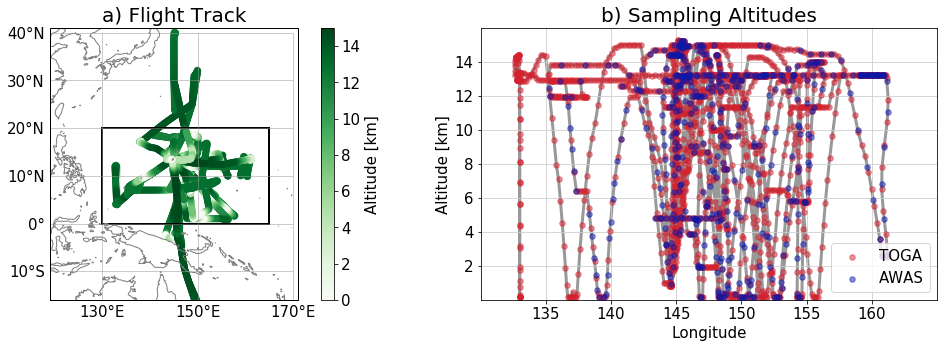

In [17]:
# plot by longitude on x axis, altitude on y axis
fig = plt.figure(figsize=(18,5)) 
########## plot location 
ax1 = plt.subplot(1, 2, 1, projection = ccrs.PlateCarree())
#ax1.scatter(toga_trc.GGLON, toga_trc.GGLAT, c = toga_trc.GGALT/1000, cmap = 'Greens')
ax1.scatter(toga_trc_whole.GGLON, toga_trc_whole.GGLAT, c = toga_trc_whole.GGALT/1000, cmap = 'Greens')

ax1.set_title('a) Flight Track', fontsize=20)

# colorbar
m = plt.cm.ScalarMappable(cmap='Greens')
m.set_array(toga_trc.GGALT.values/1000)
m.set_clim(0, 15)
cbar = plt.colorbar(m)
cbar.set_label('Altitude [km]', fontsize = 15)
cbar.ax.tick_params(labelsize=15)

# extents 
latmin = -15
latmax = 40
lonmin = 120 
lonmax = 170

gray = [0.5, 0.5, 0.5]

ax1.set_extent([lonmin-1, lonmax+1, latmin-1, latmax+1], ccrs.PlateCarree())
ax1.coastlines(resolution='50m', color=gray, linewidth=1)
gg = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='0.6', linestyle='-')
gg.xlocator = mticker.FixedLocator([110, 130, 150, 170])
gg.ylocator = mticker.FixedLocator([-20, -10, 0, 10, 20, 30, 40])

gg.xlabels_top = False
gg.ylabels_right = False
gg.xformatter = LONGITUDE_FORMATTER
gg.yformatter = LATITUDE_FORMATTER
gg.xlabel_style = {'size': 15, 'color': 'k'}
gg.ylabel_style = {'size': 15, 'color': 'k'}

## add box 
from matplotlib.patches import Rectangle
# Create a Rectangle patch
rect = Rectangle((130,0),35,20,linewidth=2,edgecolor='k',facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect)

########################################################################################
########################################################################################
ax0 = plt.subplot(1, 2, 2)
# plot general flight track first 
ax0.plot(toga_trc.GGLON, toga_trc.GGALT/1000, c = '0.6', linewidth = 3, zorder = 1)
ax0.set_title('b) Sampling Altitudes', fontsize=20)

# axes, labels, ticks, .... 
ax0.set_ylim([0, 16])
ax0.set_yticks(np.arange(2, 16, step = 2))
ax0.set_ylabel('Altitude [km]', fontsize=15)

ax0.set_xlim([130, 165])
ax0.set_xticks(np.arange(135, 165, step = 5))
ax0.set_xlabel('Longitude', fontsize=15)

ax0.tick_params(axis='both', which='major', labelsize=15)
ax0.grid(which='major', linestyle='-', color = '0.8')

# add markers for toga
color_toga = [[0.83, 0.13, 0.18]]
ax0.scatter(toga_trc.GGLON, toga_trc.GGALT/1000, 30, c = color_toga, zorder = 2, 
                alpha = 0.5, label = 'TOGA')

# add markers for awas 
color_awas = [[0.05, 0.09, 0.66]]
ax0.scatter(awas_trc.GGLON, awas_trc.GGALT/1000, 30, c = color_awas, zorder = 3, 
                alpha = 0.5, label = 'AWAS')

# add legend
ax0.legend(loc = 'lower right', fontsize = 15)

########################################################################################
########################################################################################
# save figure 
fig.savefig('figure1_noRF06.pdf')
fig.savefig('figure1_noRF06.png')